<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> <b> Diplomado de Análisis de datos y Machine Learning en Python - Universidad de Antioquia </b> </h1>
<hr size=10 noshade color="green">
<p>
<img alt="CC BY-NC-SA logo" height="70px" src="https://lahormigonera.info/wp-content/uploads/2014/04/by-nc-sa-ccLicense.png" align="left" hspace="0px" vspace="0px">
</p>

<div align="right">  
Este documento está bajo licencia <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es">[CC BY-NC-SA]</a><br> 
<a href="mailto:sheryl.avendano@udea.edu.co"> ✉ Sheryl Avendaño </a> , <a href="mailto:semilleroscen@udea.edu.co"> ✉ Semilleros Facultad de Ciencias Exactas y Naturales </a><br>

Versión actualizada: 5-09-2020
</div>

<br>

**El presente curso hace parte del centro de Big Data de la Facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.**

El curso será dictado en 11 sesiones o clases de 4 horas los días sábado por Google Meet. Para un total de dedicación temporal de 45 horas. El curso cuenta con los siguientes módulos:

1. Introducción a Python (9H)
2. Datos y pre-procesado (9H)
3. Análisis exploratorio (9H)
4. Desarrollo del modelo (9H)
5. Machine learning (9H)



# **Clasificación**



El el objetivo en la **clasificación** es predecir una clase, que corresponde a una opción entre una lista predefinida de posibilidades. El problema de clasificación puede separarse en dos categorías:

* Clasificación binaria: cuyo proposito consiste en estimar si una instacia corresponde a una clase de dos posibles. La clasificación binaria puede pensarsar como el dar respuesta de si o no a una pregunta; clasificar un paciente como enfermo o sano, respecto a una enfermedad; clasificar un correo como spam o no; etc.

* Clasificación multi-clase: en donde se estima si una instacia corresponde a una clase de mas de dos clases posibles. Algunos ejemplos de clasificación multi-clases en ML consiten en la clasificación de plantas de diferentes especies; clasificación para predecir el lenguaje de una determinada página Web; etc.

Recordemos que el problema de **regresión**  consiste en la determinación de una una variable objetivo continua, mientras que en el problema de **clasificación** se busca poner un conjunto de etiquetas finitas a las instancias de la tabla.

##Clasificador: Máquina de soporte vectorial

Supogamos que tenemos un dataset con dos características y  queremos clasificar con una línea recta (hiperplano en el caso de mas dimensiones) a que grupo (rojos o azules) corresponde cada uno. 

<p><img height="230px" src="https://miro.medium.com/max/300/0*9jEWNXTAao7phK-5.png"  hspace="10px" vspace="0px">
  <img height="230px" src="https://miro.medium.com/max/300/0*0o8xIA4k3gXUDCFU.png"  hspace="10px" vspace="0px"></p>


En la figura de la izquierda, podemos ver que tenemos "infinitas" rectas que sirven para clasificar los dos grupos. En SVM escogemos la recta (hiperplano) que maximiza el margen, entendiendo como el margen la distacia maxima que hay entre los puntos de las dos clases. Los puntos que están mas cerca de la frontera (línea punteada) se conocen como los vectores de soporte, estos pueden quedar sobre la línea de frontera o fuera de ella. En la figura de la derecha son datos que aparecen con el color relleno.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# copiando el archivo mlutils.py en la carpeta local
!wget "https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s06/mlutils.py"
import mlutils

--2022-04-02 13:12:03--  https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s06/mlutils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10691 (10K) [text/plain]
Saving to: ‘mlutils.py’

mlutils.py          100%[===================>]  10.44K  --.-KB/s    in 0s      

2022-04-02 13:12:04 (24.1 MB/s) - ‘mlutils.py’ saved [10691/10691]



In [3]:
from sklearn.datasets import *
from sklearn.model_selection import train_test_split

### Clasificador Lineal binario

In [4]:
X,y = make_blobs(400, centers=2, cluster_std=1, random_state=0)
X.shape, y.shape

((400, 2), (400,))

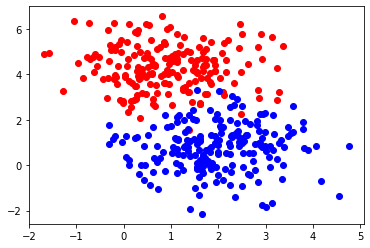

In [5]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="red")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="blue")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

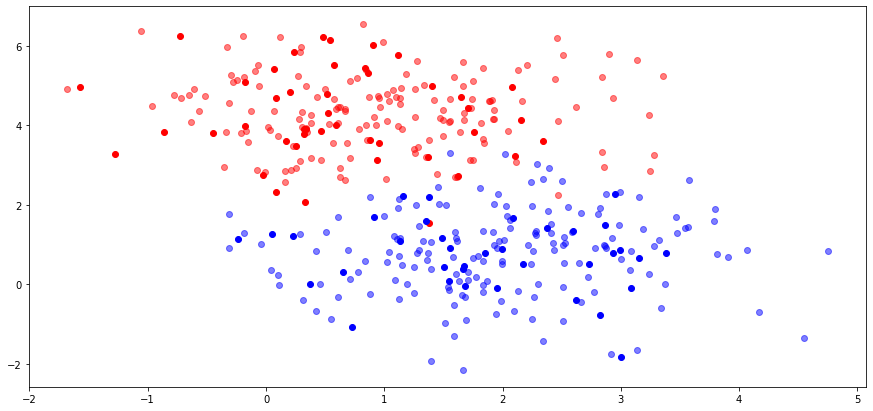

In [7]:
plt.figure(figsize=(15,7))
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color="red", alpha=0.5)
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color="blue", alpha=0.5)

plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], color="red")
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], color="blue")

In [8]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

Metrica: Accuracy

C= 0.01
score_train 0.953125
score_test 0.95


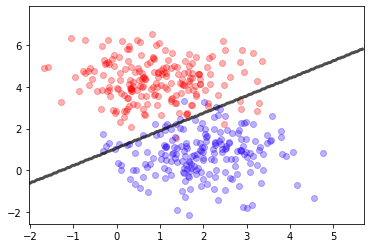

C= 0.1
score_train 0.971875
score_test 0.9875


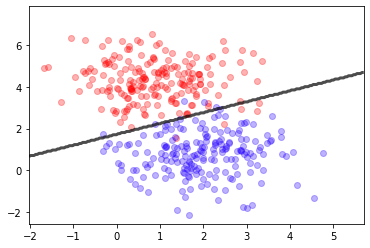

C= 1.0
score_train 0.978125
score_test 0.975


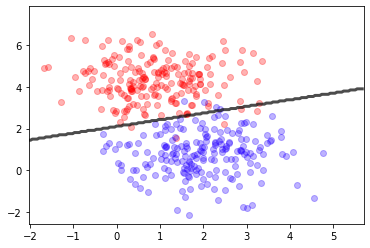

C= 10.0
score_train 0.98125
score_test 0.975


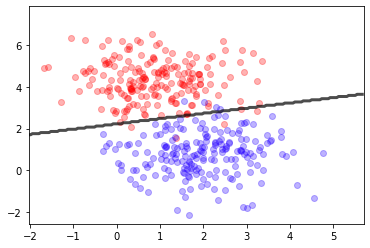

In [9]:
for C_param in np.array([0.01,0.1,1.0,10]):
  sv = LinearSVC(C=C_param, max_iter=10000)
  sv.fit(X_train,y_train)
  print ("C=", C_param)
  print ("score_train",sv.score(X_train,y_train))
  print ("score_test",sv.score(X_test,y_test))
  mlutils.plot_2Ddata(X, y, dots_alpha=.3)
  mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                   line_width=3, line_alpha=.7, label=None)
  plt.show()


Para LinearSVC el parámetro C determina la regularización. Valores altos de C corresponden con baja regularización. En otras palábras, para valores altos de C el algoritmo trata de ajustarse al set de entrenamiento lo mejor posible, mientras que para valores bajos de C, el algoritmo agrega penalidad a los pesos altos, similar a la función del hiperparámetro $\alpha$ en la regresión de Ridge.


Si usamos el método SVC con kernel lineal, podemos ver cuantos y  cuales son los vectores de soporte que está utilizando el algoritmo.

number of support vectors 27


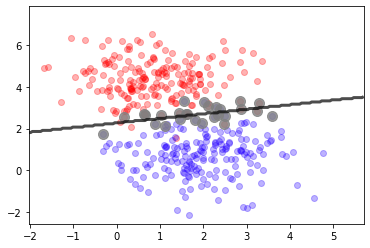

In [10]:
sv = SVC(kernel='linear')
sv.fit(X_train,y_train)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")
print ("number of support vectors", len(sv.support_vectors_))

### Clasificador Lineal Múlticlase

In [11]:
!pip install mglearn

     |████████████████████████████████| 540 kB 4.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=4a9efe8b4fec3ed87bb63c4542c0e73babb4075adc1a362ec3b954f954a28a4e
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


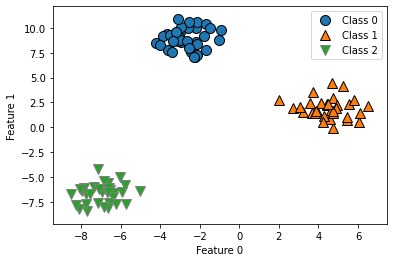

In [13]:
import mglearn
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()


Como en este caso son tres clases, lo que tenemos es un clasificador lineal para cada una de ellas

In [14]:
linear_svm = LinearSVC().fit(X, y)

In [15]:
#dir
#linear_svm.

In [16]:
linear_svm.coef_

array([[-0.17492316,  0.23140005],
       [ 0.47622671, -0.06935948],
       [-0.18914252, -0.20399642]])

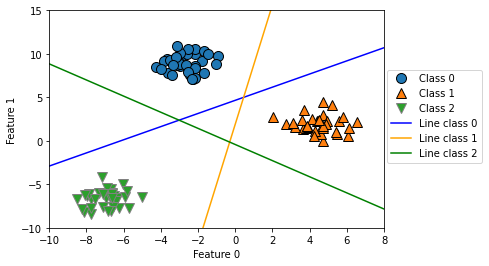

In [17]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
['b', 'orange', 'g']):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))

en este punto nos podemos preguntar: ¿Qué pasa con los puntos que pueden estar dentro del triángulo formado por las intersecciones? Esos puntos se clasificarán dependiendo de la línea que tengan más cercana.   


In [ ]:
mglearn.plots.plot_2d_classification?

Text(0, 0.5, 'Feature 1')

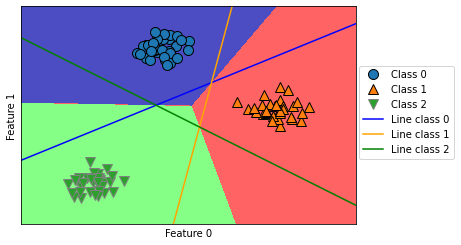

In [18]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
['b', 'orange', 'g']):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


### Clasificador no lineal

Igual a como vimos en la regresión usando máquinas de soporte vectorial, "el truco" para resolver problemas de clasificación que no sean lineales, es usando un kernel que mapea los datos a un espacio de mayor dimensionalidad.   

Text(0, 0.5, 'Feature 1')

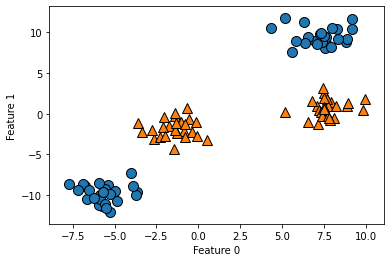

In [19]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

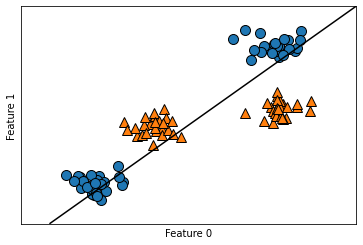

In [20]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=10000).fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [22]:
linear_svm.score(X, y)

0.66

Text(0.5, 0, 'feature1 ** 2')

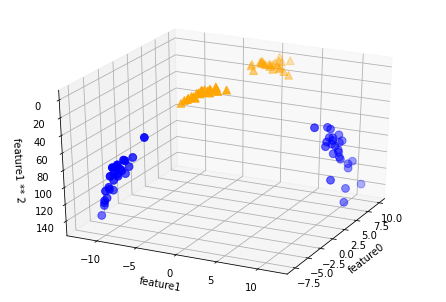

In [23]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='orange', marker='^',
cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Text(0.5, 0, 'feature0 ** 2')

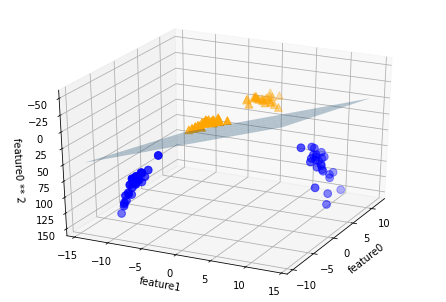

In [24]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='orange', marker='^',
cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")


Text(0, 0.5, 'Feature 1')

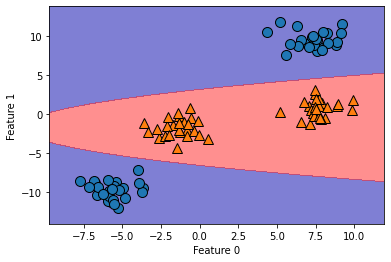

In [25]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Usando los kernel
Igual que para la regresión, los kernel disponibles en sklearn son lineal ('linear'), polinómico ('poly'), función de base radial ('rbf'), sigmoide('sigmoid'). El hiperparámetro $\gamma$ está asociado a los coeficientes de los kernel. Veamos por ejempĺo en el caso del kernel de base radial (RBF) $K_{rbf}=\exp(-\gamma |x_1-x_2|^2)$ la dependencia de $\gamma$ en la clasificación. En este caso lo podemos interpretar como *cuanto de cercanos han de estar dos puntos para considerarlos similares*






In [30]:
X,y = make_moons(400, noise=0.1, random_state=10)

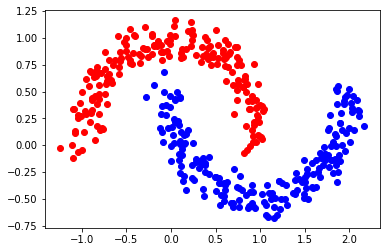

In [31]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="red")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="blue")

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

$\gamma$ pequeño

In [33]:
sv = SVC(kernel='rbf',gamma=1e-2)
sv.fit(X_train,y_train)
print ("score_train",sv.score(X_train,y_train))
print ("score_test",sv.score(X_test,y_test))

score_train 0.821875
score_test 0.9125


number of support vectors 198


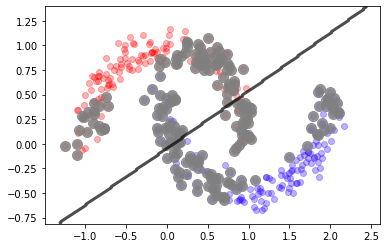

In [34]:
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")
print ("number of support vectors", len(sv.support_vectors_))

$\gamma$ mediano

score_train 0.996875
score_test 1.0
number of support vectors 47


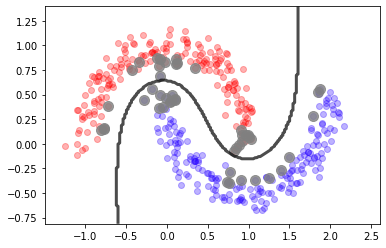

In [35]:
sv = SVC(gamma=1)
sv.fit(X_train,y_train)
print ("score_train",sv.score(X_train,y_train))
print ("score_test",sv.score(X_test,y_test))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")
print ("number of support vectors", len(sv.support_vectors_))

$\gamma$ grande

score_train 1.0
score_test 1.0
number of support vectors 211


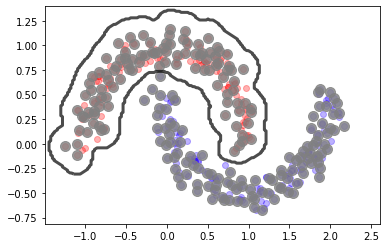

In [36]:
sv = SVC(gamma=100)
sv.fit(X_train,y_train)
print ("score_train",sv.score(X_train,y_train))
print ("score_test",sv.score(X_test,y_test))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")
print ("number of support vectors", len(sv.support_vectors_))

# **Vecinos más cercanos - knn**

El algoritmo de k-NN es, sin lugar a dudas es el algoritmo más simple de ML. El modelo consiste solo en el almacenamiento en memoria de los datos de entrenamiento. Mediante este algoritmo, la clase de una instacia se predice al buscar dentro de los datos los vecinos más cercanos a la instacia.

**Clasificación en k-NN**

La forma más sencilla de k-NN consiste en la busqueda del vecino más cercano a una instancia nueva, cuya clase queremos predecir. La predicción corresponderá entonces a la clase del dato de entrenamiento más cercano a la nueva instancia. En la siguiente figura se ilustra este caso de clasificación en unos datos de entrenamiento genérico. Las instancias nuevas, se representan mediate estrellas y color representa la clase, deducida del vecino más cercano. Cada instancia nueva se asocia con el vecino más cercano mediante una linea que los conecta. 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:

# install mglear (Book introduction to machine learnig with python)
!pip install mglearn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


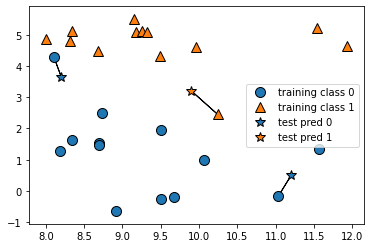

In [39]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=1);

En lugar de considerar solo un vecino, podemos considerar un número arbitrario de k vecinos (de ahí el nombre del algoritmo k-NN). Cuando se considera más de un vecino, la clase se deduce como un "sistema de votación", es decir, se cuenta cuantos vecinos pertenecen a una clase u otra y se clasifica la nueva instancia como perteneciente a la clase más frecuente del conteo; en otras palabras, estamos escogiendo la clase mayoritaria entre los k vecinos más cercanos. En la siguiente figura se ilustra el proceso para varios vecinos de las nuevas instancias:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


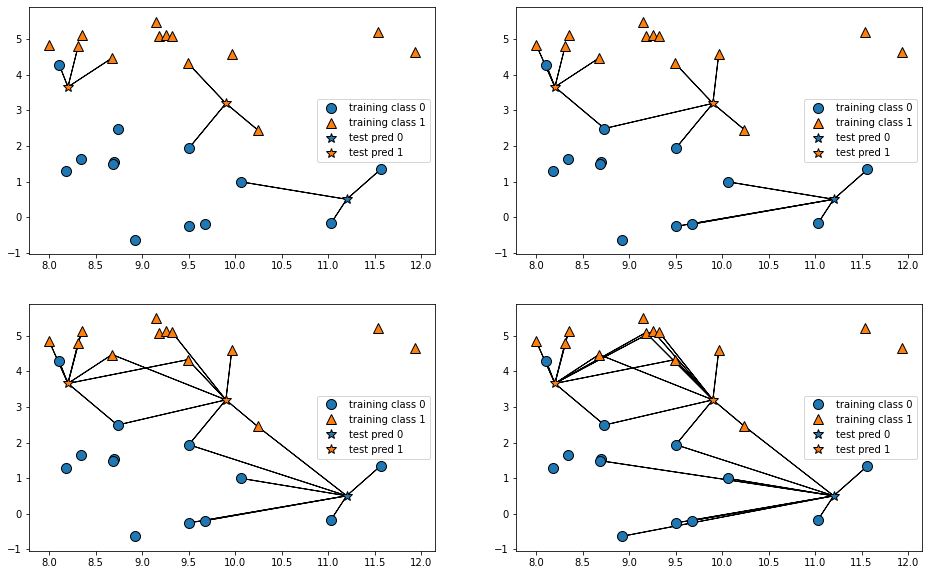

In [40]:
plt.figure(figsize=(16,10))

plt.subplot(221)
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.subplot(222)
mglearn.plots.plot_knn_classification(n_neighbors=5)
plt.subplot(223)
mglearn.plots.plot_knn_classification(n_neighbors=7)
plt.subplot(224)
mglearn.plots.plot_knn_classification(n_neighbors=9);

Nuevamente, las predicciones se muesta como el color de la estrella. Puede observarse, en relación al caso de un vecino más cercano, como la predicción de la clase a la que pertenece la instancia puede cambiar (estrella de la esquina izquierda).

Anque este ejemplo se trata de una **clasificación binaria**, este método puede aplicarse en bases de datos multiclases. En el caso de varias clases, se cuenta el numero de vecinos perteneciente a una clase y, nuevamente, se escoge la clase más común.

Veamos ahora como aplicar el algoritmo de k-NN mediante la librería de `scikit-learn`. En  primer lugar, dividamos nuestros datos en datos de entrenamiento y test:

In [41]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Vemos la apariencia que tiene este dataset:

In [42]:
data_set = np.concatenate([X,y.reshape(-1,1)],axis=1);
data_set

array([[ 9.96346605,  4.59676542,  1.        ],
       [11.0329545 , -0.16816717,  0.        ],
       [11.54155807,  5.21116083,  1.        ],
       [ 8.69289001,  1.54322016,  0.        ],
       [ 8.1062269 ,  4.28695977,  0.        ],
       [ 8.30988863,  4.80623966,  1.        ],
       [11.93027136,  4.64866327,  1.        ],
       [ 9.67284681, -0.20283165,  0.        ],
       [ 8.34810316,  5.13415623,  1.        ],
       [ 8.67494727,  4.47573059,  1.        ],
       [ 9.17748385,  5.09283177,  1.        ],
       [10.24028948,  2.45544401,  1.        ],
       [ 8.68937095,  1.48709629,  0.        ],
       [ 8.92229526, -0.63993225,  0.        ],
       [ 9.49123469,  4.33224792,  1.        ],
       [ 9.25694192,  5.13284858,  1.        ],
       [ 7.99815287,  4.8525051 ,  1.        ],
       [ 8.18378052,  1.29564214,  0.        ],
       [ 8.7337095 ,  2.49162431,  0.        ],
       [ 9.32298256,  5.09840649,  1.        ],
       [10.06393839,  0.99078055,  0.   

Gráficamente tenemos:

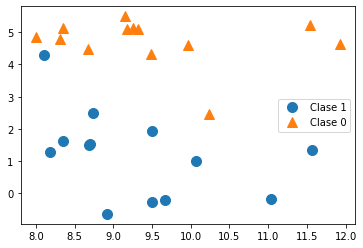

In [43]:
plt.plot(data_set[np.where(data_set[:,2] == 0)][:,0],data_set[np.where(data_set[:,2] == 0)][:,1],'o',markersize=10, label='Clase 1')
plt.plot(data_set[np.where(data_set[:,2] == 1)][:,0],data_set[np.where(data_set[:,2] == 1)][:,1],'^',markersize=10, label='Clase 0')
plt.legend(loc='center right')

Como paso siguiente, importamos e instanciamos la clase. En este punto, podemos estabecer los parámetros, como, por ejemplo, el número de vecinos, el cual estableceremos en tres.

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
clf = KNeighborsClassifier(n_neighbors=3)

Ajuestemos ahora el clasificafor usando el conjunto de entrenamiento. Para el el `KNeighborsClassifier` esto implica el almacenamiento de los datos, de tal forma que pueda calcularse los vecinos más cercanos usados en la predicción de las clases de las instancias:

In [51]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Para hacer las predicciones en el conjunto de evaluación, empleamos el método `predict`. Este método calculará para cada data en el conjunto de evaluación los vecinos mas cercanos en el conjunto de entrenamiento, y determinar así, la clase más común entre ellos:

In [52]:
clf.score(X_test, y_test)

0.8571428571428571

In [53]:
y_test

array([1, 0, 1, 0, 1, 1, 0])

In [54]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


Para evaluar el desempeño de nuestro modelo, usamos el método `score` con los datos de entrenamiento y evaluación:

In [55]:
print("Test set accuracy of train data: {:.2f}".format(clf.score(X_train, y_train)))
print("Test set accuracy of test data: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy of train data: 0.95
Test set accuracy of test data: 0.86


Vemos entonces que nuestro modelo presenta un 86% de presición, es decir, que predice correctamente un 86% de los datos de evaluación. En el caso de los datos de entrenamiento, el desempeño es ligeramente mayor.

## Analisis del clasificador `KNeighborsClassifier`

Para datasets bidimensionales, se puede ilustrar la predicción para todos los posibles puntos de evaluación en el plano $xy$. En la siguiente figura se ilustra el plano dividido en las regiones de acuerdo con las clases que son asignadas para tres casos de números de vecinos, a saber, 1, 3 y 9. En esta figura se ilustrata también la frontera de decisión.

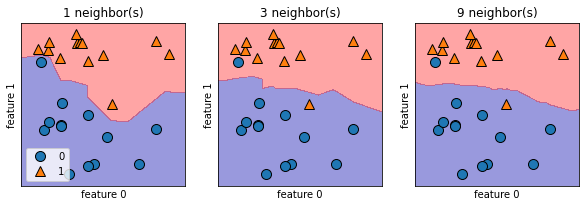

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
  # the fit method returns the object self, so we can instantiate
  # and fit in one line
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

En la figura de la **izquierda** puede observarse que cuando se usa un solo vecino para la predicción de las clases de nuevas instancias, la frontera de desición se sobreajusta a los datos. Por el contrario, entre más vecinos escojamos, la frontera se suaviza. Una **frontera de desición suave**. En otras palabras, el uso de **pocos** vecinos resulta en **complejidades mayores** de los modelos y el uso de **muchos** vecinos resulta en **complejidades menores**. En el caso extremo en que consideramos el número de vecinos igual al número de datos de la muestra, cada instancia nueva tendrá el mismo número de vecinos (toda la muestra) y la predicción será siempre la misma: la clase mas frecuente.

Veamos entonces si podemos encontrar una conexión entre la complejidad del modelo y una mayor generalización del mismo, como se señala en el párrafo anterior. 

Realicemos esto en un dataset de pacientes con cáncer de seno, extaido de los dataset de `sklearn`:

In [64]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [65]:
X_train.shape,X_test.shape

((426, 30), (143, 30))

In [66]:
training_accuracy = []
test_accuracy = []

In [67]:
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
  # build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(clf.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(clf.score(X_test, y_test))

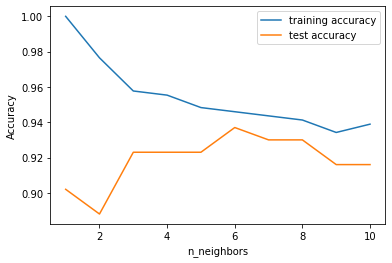

In [68]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

En la gráfica podemos ver la precisión obtenida por el modelo en los casos del conjunto de entrenamiento y evaluación en función del número de vecinos escogidos para crear el modelo. De esta gráfica podemos ver varias características de **sobreajuste** y **subajuste**. Cuando considereamos un solo vecino, la predicción en el conjunto de entrenamiento es perfecta. Cuando agregamos más vecinos, el modelo se torna más simple y la precisión decrese. Como se vio en la clase pasada, la **precisión** en el conjunto de **evaluación** es menor cuando la **complejidad** del modélo es **mayor**, es decir, cuando usamos un solo vecino para crearlo. En contraposición, cuando usamos 10 vecinos, el modelo es muy simple y su desempeño emperora. El mejor desempeño se alcanza alrededor de los 6 vecinos. 

### Ejercicio 1:

Utilice el método `validation_curve` del módulo `model_selection` de sklearn para gráficar una curva de validación del los puntajes de los datos de entrenamiento y evaluación en función del número de vecinos usados para la construcción del modelo


In [71]:
from sklearn.model_selection import validation_curve

In [73]:
clf = KNeighborsClassifier()
n_neighbors_range=range(1,18)
resultados=validation_curve(clf,X,y,param_name="n_neighbors",param_range=n_neighbors_range,cv=3)

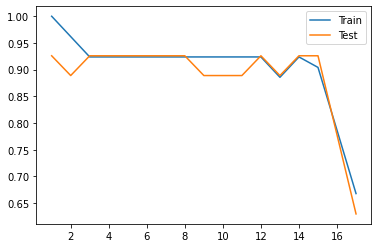

In [74]:
plt.plot(n_neighbors_range, np.mean(resultados[0],axis=1),label='Train')
plt.plot(n_neighbors_range, np.mean(resultados[1],axis=1),label='Test')
plt.legend()

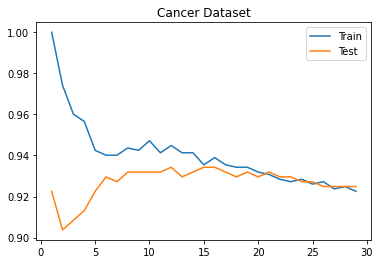

In [76]:
clf = KNeighborsClassifier()
n_neighbors_range=range(1,30)
resultados=validation_curve(clf,X_train,y_train,param_name="n_neighbors",param_range=n_neighbors_range,cv=3)
plt.title("Cancer Dataset")
plt.plot(n_neighbors_range,np.mean(resultados[0],axis=1),label='Train')
plt.plot(n_neighbors_range,np.mean(resultados[1],axis=1),label='Test')
plt.legend()

# **Naive Bayes**



Los modeslos de naive Bayes son un grupo de modelos bastante rápidos para clasificación adaptados para datos de alta dimensionalidad (datasets con muchos features)

Los modelos naive Bayes tienen muy pocos parámetros  (1 o 2) son bastante útiles como modelos de base para problemas de clasificación.

## Clasificación Bayesiana

Éstos modelos descansan sobre la teoría de estadística Bayesiana, en la cuál se describe la relación entre las probabilidades condicionales de cantidades estadísticas.


En clasificación estamos interesados en encontrar la probabilidad de un 'label' dados unos 'features', ésto puede escribirse como: $P(L~|~{\rm features})$.

Con el teorema de Bayes tenemos una forma explicita de calcular dichas cantidades:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

Si tratamos de decidir entre dos 'labels' $L_1$ y $L_2$ podemos hacerlo usando la razón de la probabilidad posterior de cada uno de dichos 'labels'.

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

Lo que necesitamos ahora es un modelo para calcular $P({\rm features}~|~L_i)$ para cada 'label'.
Ése modelo es llamado modelo generativo (generative model) dado que el proceso con el que 'hipoteticamente' se generan los datos es aleatorio.

La especificación de dicho modelo es la tarea central del algoritmo, pero esa tarea es extremadamente compleja, por ello es necesario hacer algunas suposiciónes, de ahí el nombre de 'naive' (ingenuo)

Si hacemos una suposición 'naive' para el modelo generativo de cada 'label', podemos encontrar un modelo aproximado para cada clase, y por tanto iniciar con el calculo Bayesiano para la clasificacion.

Existen diferentes tipos de suposiciones sobre los datos, y cada uno nos lleva a modelo de naive Bayes diferentes, veamos.


In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Gaussian Naive Bayes

Iniciemos con el calsificador Gaussiano Gaussian naive Bayes.
En éste tipo de clasificador el naive es que  *los labels de cada dato son generado por una distribución Gaussiana simple*.


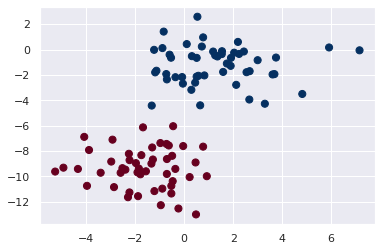

In [78]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

Una forma extremadamente rápida de crear un modelo es asumir que los datos son descritos por una distribución Gaussiana sin covarianza entre los 'features'.

Entrenar éste modelo solo necesita encontrar la media y la desviación estandad de los puntos para cada 'label'.

![](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.05-gaussian-NB.png)


Cada elipse representa el modelo para cada 'label'. Con el modelo para cada clase ahora podemos calcular $P({\rm features}~|~L_1)$ para cualquier punto, y por tanto calcular la razón posterios y determinar el 'label' más probable para el punto.

Tenemos el estimado ``sklearn.naive_bayes.GaussianNB`` en scikit-lear:

In [80]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [81]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

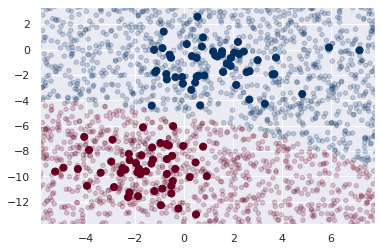

In [82]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.2)
plt.axis(lim);

Note la pequeña curvatura en la frontera de decisión, en general las fronteras de éste modelo son de tipo cuadratico.

Dada la naturaleza probabilistica de éste modelo, es posible tener la probabilidad clasificación en cada 'label': ``predict_proba``

In [83]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [84]:
ynew[-8:]

array([0, 0, 0, 0, 0, 0, 1, 1])

Tener las probabilidades de clasificación puede ser útil si deceamos estimar la incertidumbre en nuestras predicciones.

Los clasificadores naive no son los mejores cuando se tienen pocos 'features', pero al aumentar la dimensionalidad del dataset se hacen bastante útiles dada su velocidad de entrenamiento comparada con otros modelos como los lineales.


## Multinomial Naive Bayes

La asunción Gaussina es bástante simple, pero no es la única posible para generar las distribuciones de los 'labels'

También es posible asumir una distribución multinomial, dando lugar al multinomial naive Bayes. La distribución multinomial describe la probabilidad de observar un conteo sobre un número de categorías, por tanto éste modelo es apropiado para 'features' que representan conteos o ratas de conteos, por ejemplo la cantidad de palabras en un parrafo.

### Ejemplo: clasificar un texto

Uno de los usos más comunes de naive Bayes multinomial es la clasificación de texto, donde los 'features' están relacionados con el conteo de palabras o la frecuencia de ellas en un documento



In [85]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Por simplicidad solo selecionaremos algunas categorías para descargar el dataset

In [111]:
categories = ['talk.religion.misc', 'rec.autos',
              'sci.space', 'comp.graphics']
#categories = [ 'talk.politics.guns',
# 'talk.politics.mideast',
# 'talk.politics.misc',
# 'talk.religion.misc']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Veamos un ejemplo de un dato

In [112]:
N = 20
print(train.data[N])
train.target[N],train.target_names[train.target[N]]

From: roger@hpscit.sc.hp.com (Roger Mullane)
Subject: Re: 86 Acura Integra 5-speed
Organization: Hewlett-Packard, Santa Clara, CA
Lines: 26

I have a 1986 Acura Integra 5 speed with 95,000 miles on it. It is positively
the worst car I have ever owned. I had an 83 Prelude that had 160k miles on
it when I sold it, and it was still going strong .  This is with religious
attention to maintenance such as oil changes etc. Both cars were driven in
exactly the same manner..

  1. It has gone through two clutches (which are underrated.)
  2. 3 sets of tires (really eats tires in the front even with careful align)
  3. All struts started leaking about 25-30k miles
  4. Windshield wiper motor burned up (service note on this one)
  5. Seek stop working on radio about 20k miles
  6. Two timing belts.
  7. Constant error signals from computer.

  8. And finally. A rod bearing went out on the No. 1 piston seriously damaging
     the crankshaft, contaminating the engine etc. When the overhaul was done

(1, 'rec.autos')

Como hemos dicho, los modelos de machine learning son modelos matemáticos, por tanto debemos procesar nuestros datos para entregarlos al algorítmo.
Convertiremos nuestros documentos a vectores usando [TF-IDF](https://es.wikipedia.org/wiki/Tf-idf), y creando un 'pipeline' que lo conecte con el estimador multinomial.

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [114]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

Entrenemos y testeemos el modelo.

In [115]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Ya hemos predicho nuestros 'labes', evaluemos el rendimiento de nuestro estimador con una matriz de confusión.

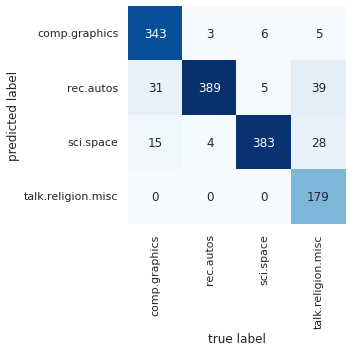

In [116]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues",
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Vemos que aunque el clasificador es bastante sencillo tiene una gran capacidad de distinción entre diferentes tópicos, por ejemplo separa bien las tematicas de 'space' y 'computer graphics', aunque se confunde algo entre 'religion' y 'christian', lo cual no sorprende.

Con éste modelo entrenado podemos ahora intentar predecir la categoria de cualquier documento (teniendo en cuenta las limitaciones del espacion muestral usado y del idioma).

In [117]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [118]:
predict_category('sending a payload to the ISS')

'sci.space'

In [119]:
predict_category('discussing islam vs christians')

'talk.religion.misc'

In [120]:
predict_category('determining the screen resolution')

'comp.graphics'

In [121]:
predict_category('I like to ride my mustang')

'rec.autos'

In [122]:
test = """To design the Bahá'í Temple of South America, architect Siamak Hariri focused on illumination -- from the temple's form, which captures the movement of the sun throughout the day, to the iridescent, luminous stone and glass used to construct it. Join Hariri for a journey through the creative process, as he explores what makes for a sacred experience in a secular world."""
predict_category(test)

'rec.autos'

Recuerde que este es un modelo simple de probabilidad pesada por fecuencias de cada palabra, sin embargo sus resultados son sorprendentes.

**Incluso un algoritmo muy ingenuo usado de la manera adecuada y entrenado con un buen dataset puede ser sorprendente**


## Cuando usar naive Bayes

Dados las asunciones de los clasificadores de Bayes sobre los datos, en genral no tendrán un gran desempeño (comparados con modelos mucho más complicados), sin embargo:



*   Son extremadamente rápidos, tanto en entrenamiento como en predicción.
*   Entregan predicciones probabilisticas de manera simple (por diseño).
*   Son muy fáciles de implementar (a nivel de programación).
*   Tiene pocos hiper-parámetros. 

Por tanto éstos clasificadores son uno de los primeros en implementarse como modelos de base.


Los clasificadores de Bayes tienden a ser muy buenos cuando:


*   Las asunciones naive realmente se cumplen en los datos (es un caso extraño en la realidad).
*   Para categirias bien diferenciadas en el espacio de carácteristicas.
*   Para datasets de alta dimensionalidad
